<a href="https://colab.research.google.com/github/SuvarnaDalin/TSF---GRIP/blob/master/Task_2_Exploring_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task # 2 - Explore Supervised Machine Learning**

**Objective**:
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

> **Problem Statement**: 
What will be predicted score if a student study for 9.25 hrs in a
day?


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading and displaying the data from external link
data_url = "http://bit.ly/w-data"
hr_score_data = pd.read_csv(data_url)
hr_score_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
hr_score_data.columns

Index(['Hours', 'Scores'], dtype='object')

**Simple Linear Regression Model: y = bX + c**

In [4]:
# Create target object and call it y
y = hr_score_data.Scores
# Create X
X = hr_score_data.Hours

**Plotting the data to identify the relationship between X ('Hours') and y ('Scores')**

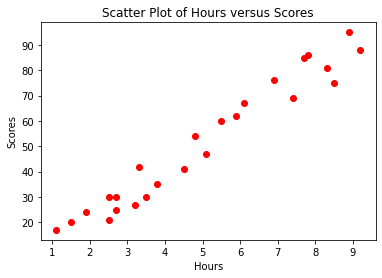

In [5]:
# Lets do a simple scatter plot
#hr_score_data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.scatter(X, y, c = 'red')
plt.title("Scatter Plot of Hours versus Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


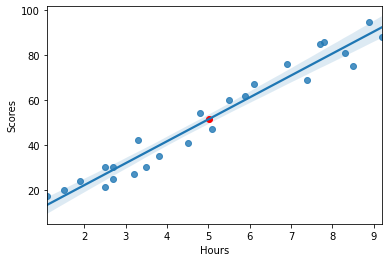

In [6]:
# Lets do the Scatter Plot showing the Regression Line
plt.figure()
sns.regplot(X, y, fit_reg = True)
plt.scatter(np.mean(X), np.mean(y), color = "red" )

**Due to the positive linear relationship between the X and y variables a Linear Regressor can be used to fit the model**

In [7]:
# Preparing the Data
X = hr_score_data.iloc[:, :-1].values  
y = hr_score_data.iloc[:, 1].values  

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size= 0.2, random_state = 100)

In [8]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((20, 1), (5, 1), (20,), (5,))

**Training & Fitting the algorithm  using LinearRegression() Model**

In [9]:
# Specify Model
LR_model = LinearRegression()

# Fit Model
LR_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Making Validation Predictions**

In [10]:
val_predictions = LR_model.predict(val_X)
val_predictions

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [11]:
# Comparison of Actual vs Predicted
LR_df = pd.DataFrame({'Actual': val_y, 'Predicted': val_predictions}) 
LR_df 

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


**Model Evaluation:** To check the accuracy of the above predictions lets use the mean_absolute_error(). Lower the error, higher will be the accuracy of predictions

In [12]:
val_mae = mean_absolute_error(val_predictions, val_y)
MAE = np.round(val_mae, 2)
print("The Validation MAE for the above predictions is: {}".format(MAE))

The Validation MAE for the above predictions is: 4.14


The low value of MAE shows acceptable accuracy rate.

**Problem Statement: What will be predicted score if a student study for 9.25 hrs in a day?**

In [13]:
hours_per_day = 9.25
Hour = np.array(hours_per_day).reshape(-1, 1)
pred_score = LR_model.predict(Hour)
print("No of Hours/day = {}".format(hours_per_day))
print("Predicted Score of the Student = {} for a Mean Absolute Error of {}".format(pred_score[0], MAE))

No of Hours/day = 9.25
Predicted Score of the Student = 92.96728365185982 for a Mean Absolute Error of 4.14


######################################################################################################